Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [96]:
df = pd.read_csv("Mall_Customers.csv", index_col=0)

Exploratory Analysis and Visualization

In [63]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [65]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Genre'>

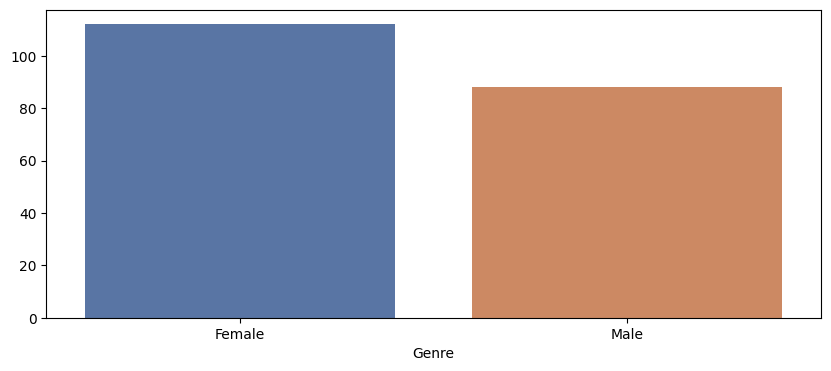

In [66]:
gender = df.Genre.value_counts()
plt.figure(figsize=(10, 4))
sns.barplot(x=gender.index, y=gender.values, palette="deep", hue=gender.index)

Creating 5 age categories

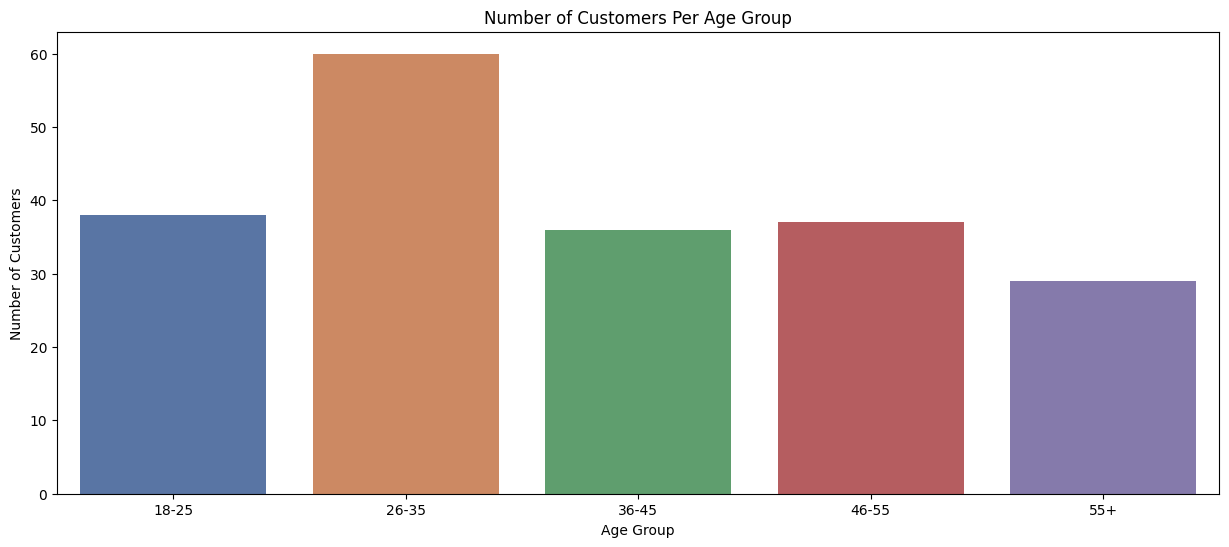

In [40]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [
    len(age18_25.values),
    len(age26_35.values),
    len(age36_45.values),
    len(age46_55.values),
    len(age55above.values),
]

plt.figure(figsize=(15, 6))
sns.barplot(x=x, y=y, palette="deep", hue=x)
plt.title("Number of Customers Per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()

Creating 5 categories for spending score

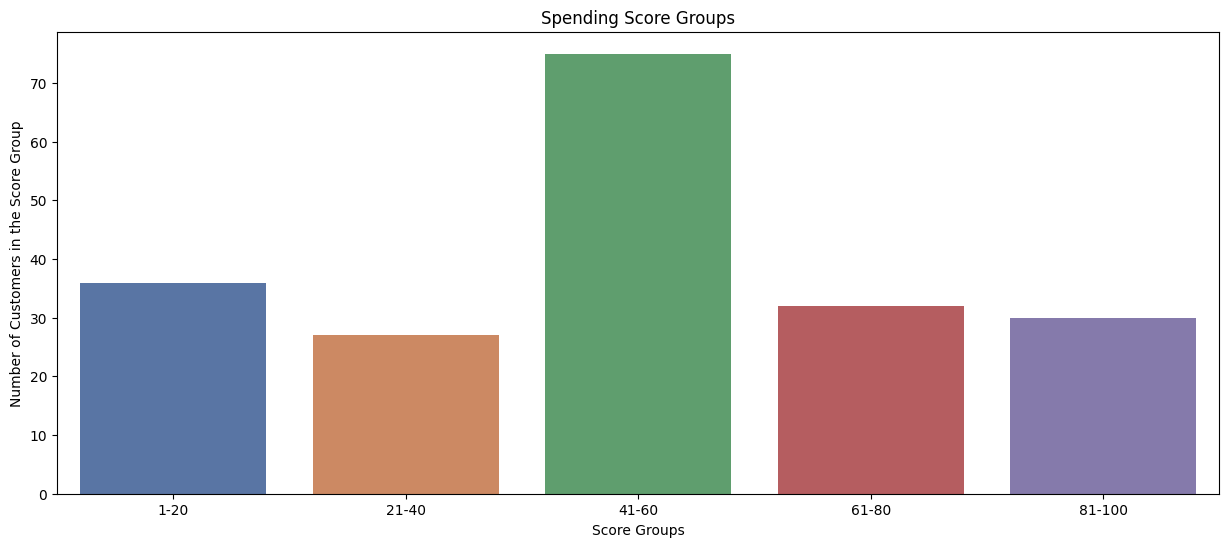

In [42]:
ss1_20 = df["Spending Score (1-100)"][
    (df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)
]
ss21_40 = df["Spending Score (1-100)"][
    (df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)
]
ss41_60 = df["Spending Score (1-100)"][
    (df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)
]
ss61_80 = df["Spending Score (1-100)"][
    (df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)
]
ss81_100 = df["Spending Score (1-100)"][
    (df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)
]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [
    len(ss1_20.values),
    len(ss21_40.values),
    len(ss41_60.values),
    len(ss61_80.values),
    len(ss81_100.values),
]

plt.figure(figsize=(15, 6))
sns.barplot(x=ssx, y=ssy, palette="deep", hue=ssx)
plt.title("Spending Score Groups")
plt.xlabel("Score Groups")
plt.ylabel("Number of Customers in the Score Group")
plt.show()

Create 5 categories for annual income

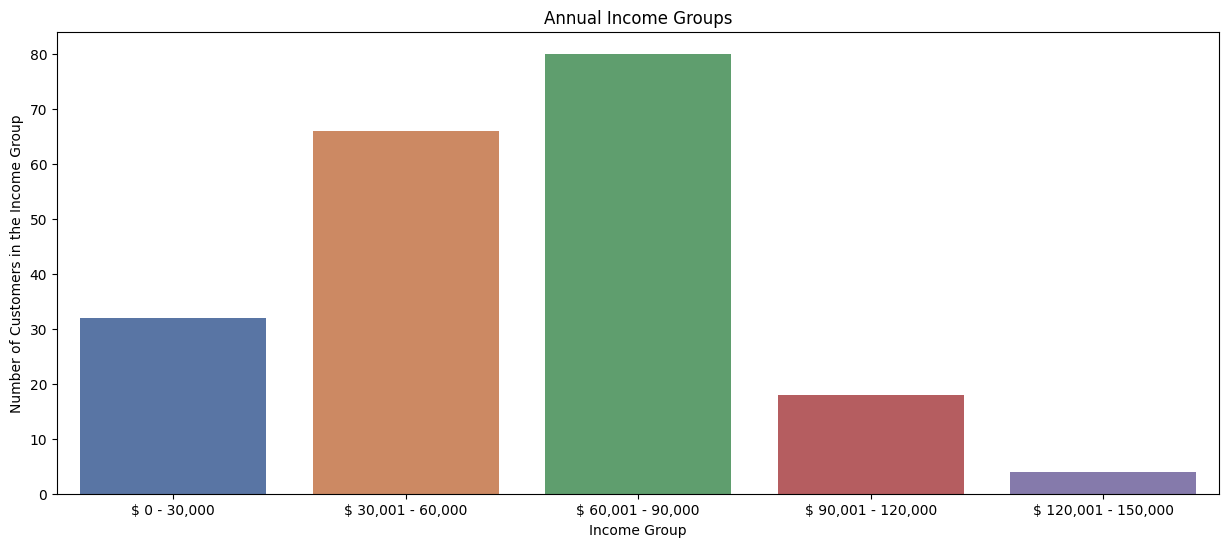

In [43]:
ai0_30 = df["Annual Income (k$)"][
    (df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)
]
ai31_60 = df["Annual Income (k$)"][
    (df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)
]
ai61_90 = df["Annual Income (k$)"][
    (df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)
]
ai91_120 = df["Annual Income (k$)"][
    (df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)
]
ai121_150 = df["Annual Income (k$)"][
    (df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)
]

aix = [
    "$ 0 - 30,000",
    "$ 30,001 - 60,000",
    "$ 60,001 - 90,000",
    "$ 90,001 - 120,000",
    "$ 120,001 - 150,000",
]
aiy = [
    len(ai0_30.values),
    len(ai31_60.values),
    len(ai61_90.values),
    len(ai91_120.values),
    len(ai121_150.values),
]

plt.figure(figsize=(15, 6))
sns.barplot(x=aix, y=aiy, palette="deep", hue=aix)
plt.title("Annual Income Groups")
plt.xlabel("Income Group")
plt.ylabel("Number of Customers in the Income Group")
plt.show()

KMeans Clustering Models

The elbow method is a graphical representation of finding the optimal ‘K’ in a k-means clustering. This is typically done by picking out the k-value where the elbow is created.

In [97]:
df5 = df  # dataframe for kmeans clusters
df5.drop(["Genre"], axis=1, inplace=True)
df5.drop(["Age"], axis=1, inplace=True)
df5 = df5.sample(frac=1)
df5.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
101,62,41
148,77,74
89,58,60
42,38,92
177,88,15


Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

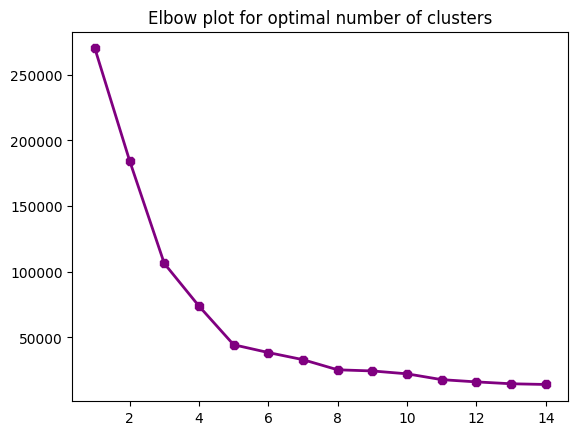

In [103]:
wscc = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(df5)
    wscc.append(kmeans.inertia_)

plt.plot(range(1, 15), wscc, linewidth=2, color="purple", marker="8")
plt.title("Elbow plot for optimal number of clusters")

The elbow method doesn't show a true elbow, probably due to the small sample size. Next we can test using 4 and 5 clusters

In [107]:
k_means = KMeans(n_clusters=5,)
k_means.fit(df5)
np.unique(k_means.labels_)
centers = k_means.cluster_centers_
centers

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

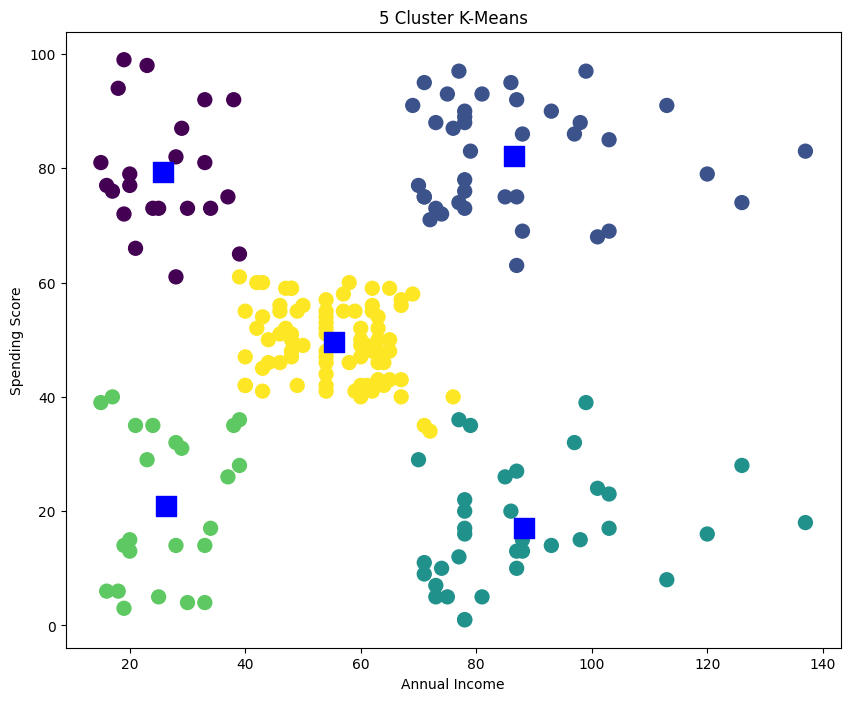

In [108]:
plt.figure(figsize=(10, 8))

plt.scatter(
    df5["Annual Income (k$)"], df5["Spending Score (1-100)"], c=k_means.labels_, s=100
)

plt.scatter(centers[:, 0], centers[:, 1], color="blue", marker="s", s=200)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("5 Cluster K-Means")

plt.show()

In [109]:
k_means = KMeans(
    n_clusters=4,
)
k_means.fit(df5)
np.unique(k_means.labels_)
centers = k_means.cluster_centers_
centers

array([[87.        , 18.63157895],
       [48.16831683, 43.3960396 ],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

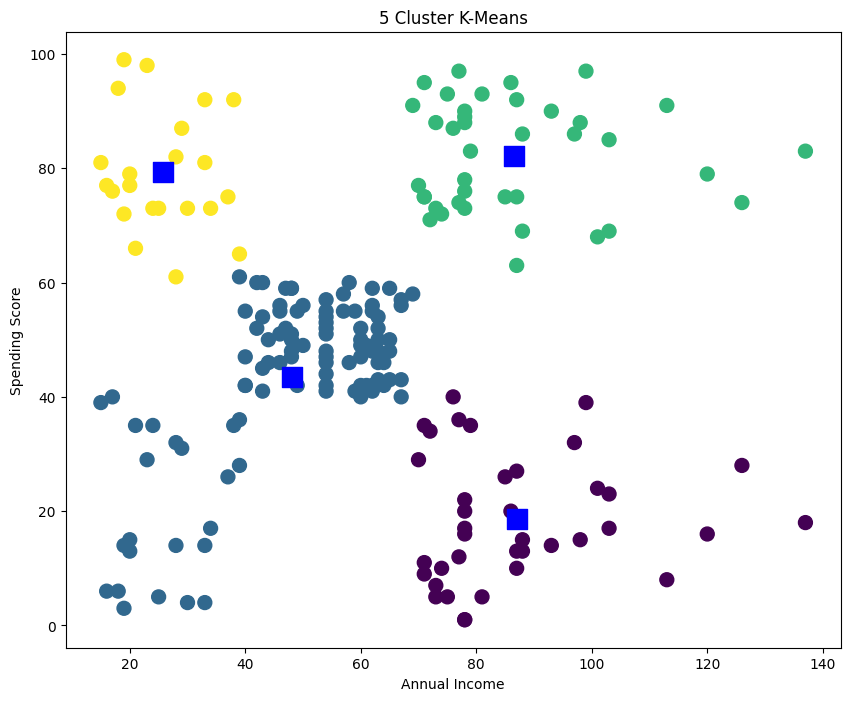

In [110]:
plt.figure(figsize=(10, 8))

plt.scatter(
    df5["Annual Income (k$)"], df5["Spending Score (1-100)"], c=k_means.labels_, s=100
)

plt.scatter(centers[:, 0], centers[:, 1], color="blue", marker="s", s=200)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("5 Cluster K-Means")

plt.show()

Using 5 clusters seems to model the data better than using 4 clusters